In [1]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/home/jay/In-Vehicle_Coupon_Recommendation/DS_DATA.csv')
data.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [4]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Detailed report of the data

missing_percentage = np.round(data.isnull().mean()*100,2)
missing_count = data.isnull().sum()
data_types = data.dtypes
data_show = data.head(2).T
data_show.columns = ['Sample 1', 'Sample 2']
detail_report = pd.DataFrame({'Data Type': data_types,'Missing Count':missing_count,'Missing Percentage':missing_percentage })
detail_report = pd.concat([data_show, detail_report], axis=1)
print(detail_report)

                                      Sample 1                  Sample 2  \
destination                    No Urgent Place           No Urgent Place   
passanger                                Alone                 Friend(s)   
weather                                  Sunny                     Sunny   
temperature                                 55                        80   
coupon                         Restaurant(<20)              Coffee House   
expiration                                  1d                        2h   
gender                                  Female                    Female   
age                                         21                        21   
maritalStatus                Unmarried partner         Unmarried partner   
has_children                                 1                         1   
education             Some college - no degree  Some college - no degree   
occupation                          Unemployed                Unemployed   
income      

In [6]:
# 1. dropping car column as missing percentage is 99% 
# 2. dropping toCoupon_GEQ5min column as all rows are same,so it won't affect the data
data = data.drop(['car','toCoupon_GEQ5min'],axis = 1)

# Handling Missing Values


In [7]:
# mode imputation for missing values in data

data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

# Removing Duplicates

In [8]:
duplicate = data[data.duplicated(keep = 'last')]
data = data.drop_duplicates()
print("Shape of dataset after removing duplicates:",data.shape)

Shape of dataset after removing duplicates: (12393, 23)


# Distribution of the Target class 

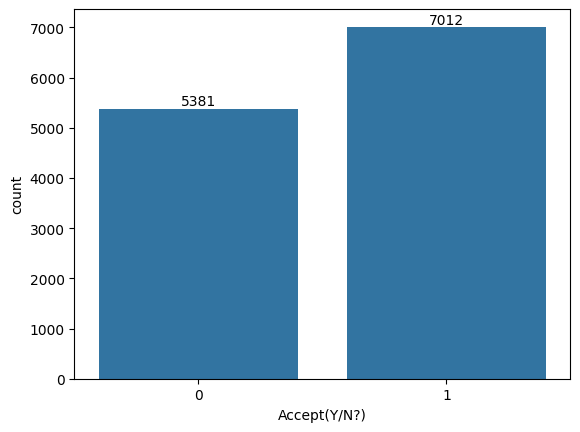

In [9]:
ax = sns.countplot(data = data,x='Accept(Y/N?)')
ax.bar_label(ax.containers[0])
plt.show()

<Axes: ylabel='count'>

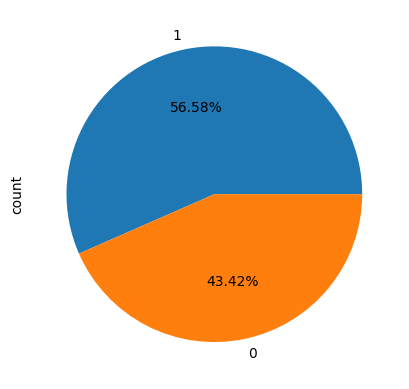

In [10]:
data['Accept(Y/N?)'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [11]:
# From above graphs we can infer that the dataset is not balanced.
# The acceptance ratio is little more than rejection ratio.  

# EDA

In [12]:
cat_cols = [cols for cols in data.columns if data[cols].dtypes == 'O']
num_cols = [cols for cols in data.columns if data[cols].dtypes != 'O']
cat_cols

['destination',
 'passanger',
 'weather',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

# Univariate Analysis

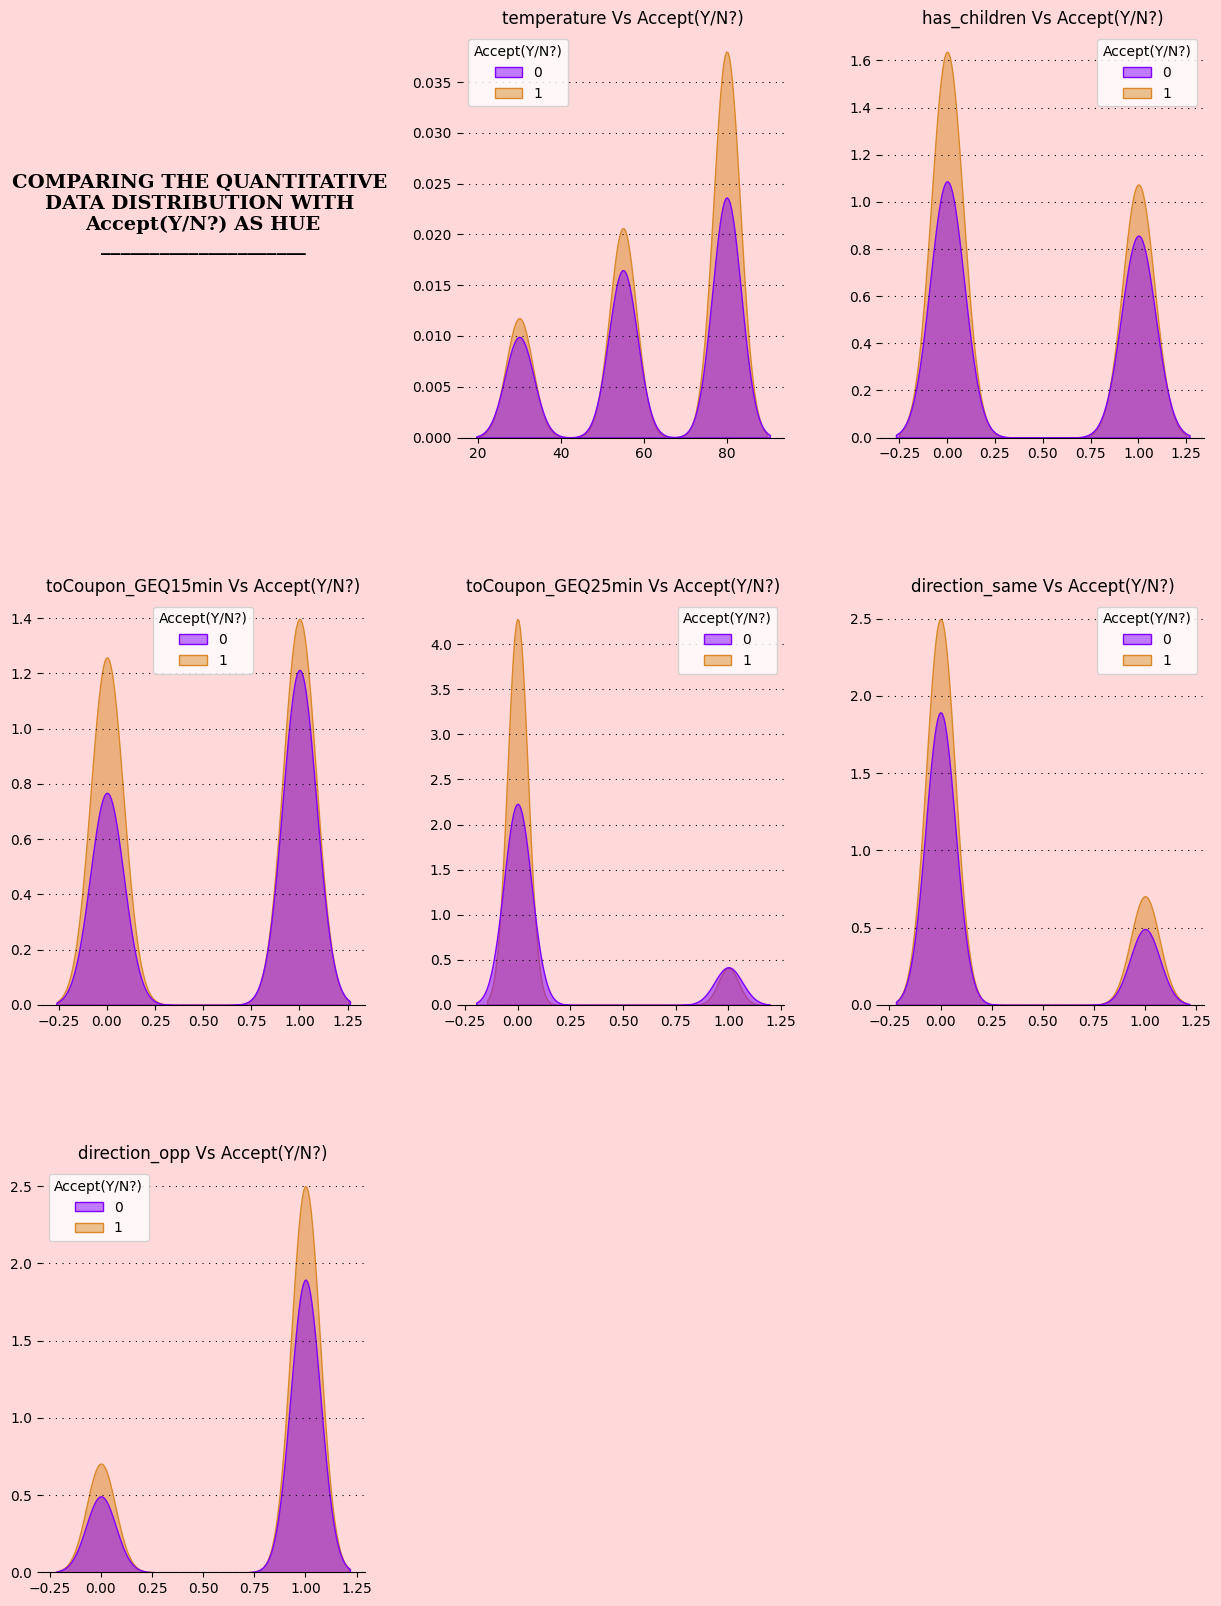

In [13]:
# Comparing the proportion of distribution of targets across numerical classes

# Creating the plot structure
fig = plt.figure(figsize=(15, 20))
spec = fig.add_gridspec(3, 3)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,0])

# adding color preference
bg_color = '#ffd9d9'
for section in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07]:
    section.set_facecolor(bg_color)


sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07]

cnt = 0
for feature in data.columns:
    if data[feature].dtype != 'O':
        sns.kdeplot(data, x=feature, hue='Accept(Y/N?)',
                    fill=True, palette=["#8000ff","#da8829"],
                    alpha=0.5, ax=sec[cnt])
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature+' Vs Accept(Y/N?)')
        sec[cnt].grid(color='#000000', ls=':', axis='y', dashes=(1,5))

        for position in ['left', 'right', 'top']:
            sec[cnt].spines[position].set_visible(False)

        cnt += 1
        if cnt==6:
            break

# Creating plot structure title
sec_01.text(0.5,0.5,'COMPARING THE QUANTITATIVE \nDATA DISTRIBUTION WITH \nAccept(Y/N?) AS HUE\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing axis and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)

In [14]:
# OBSERVATION ON QUANTITATIVE DATA DISTRIBUTION :

#   1. For the quantitative variables, the distribution of rejection follows the same pattern of distribution
#      for acceptance with less density.

#   2. Since the distribution of acceptance follows a similar pattern with high density, further analysis
#      can be carried on with data where coupon is accepted.

#   3. The coupon acceptance rate is high when the temprature is 80.

#   4. Also the customers with no children have high chances of accepting the coupon. 


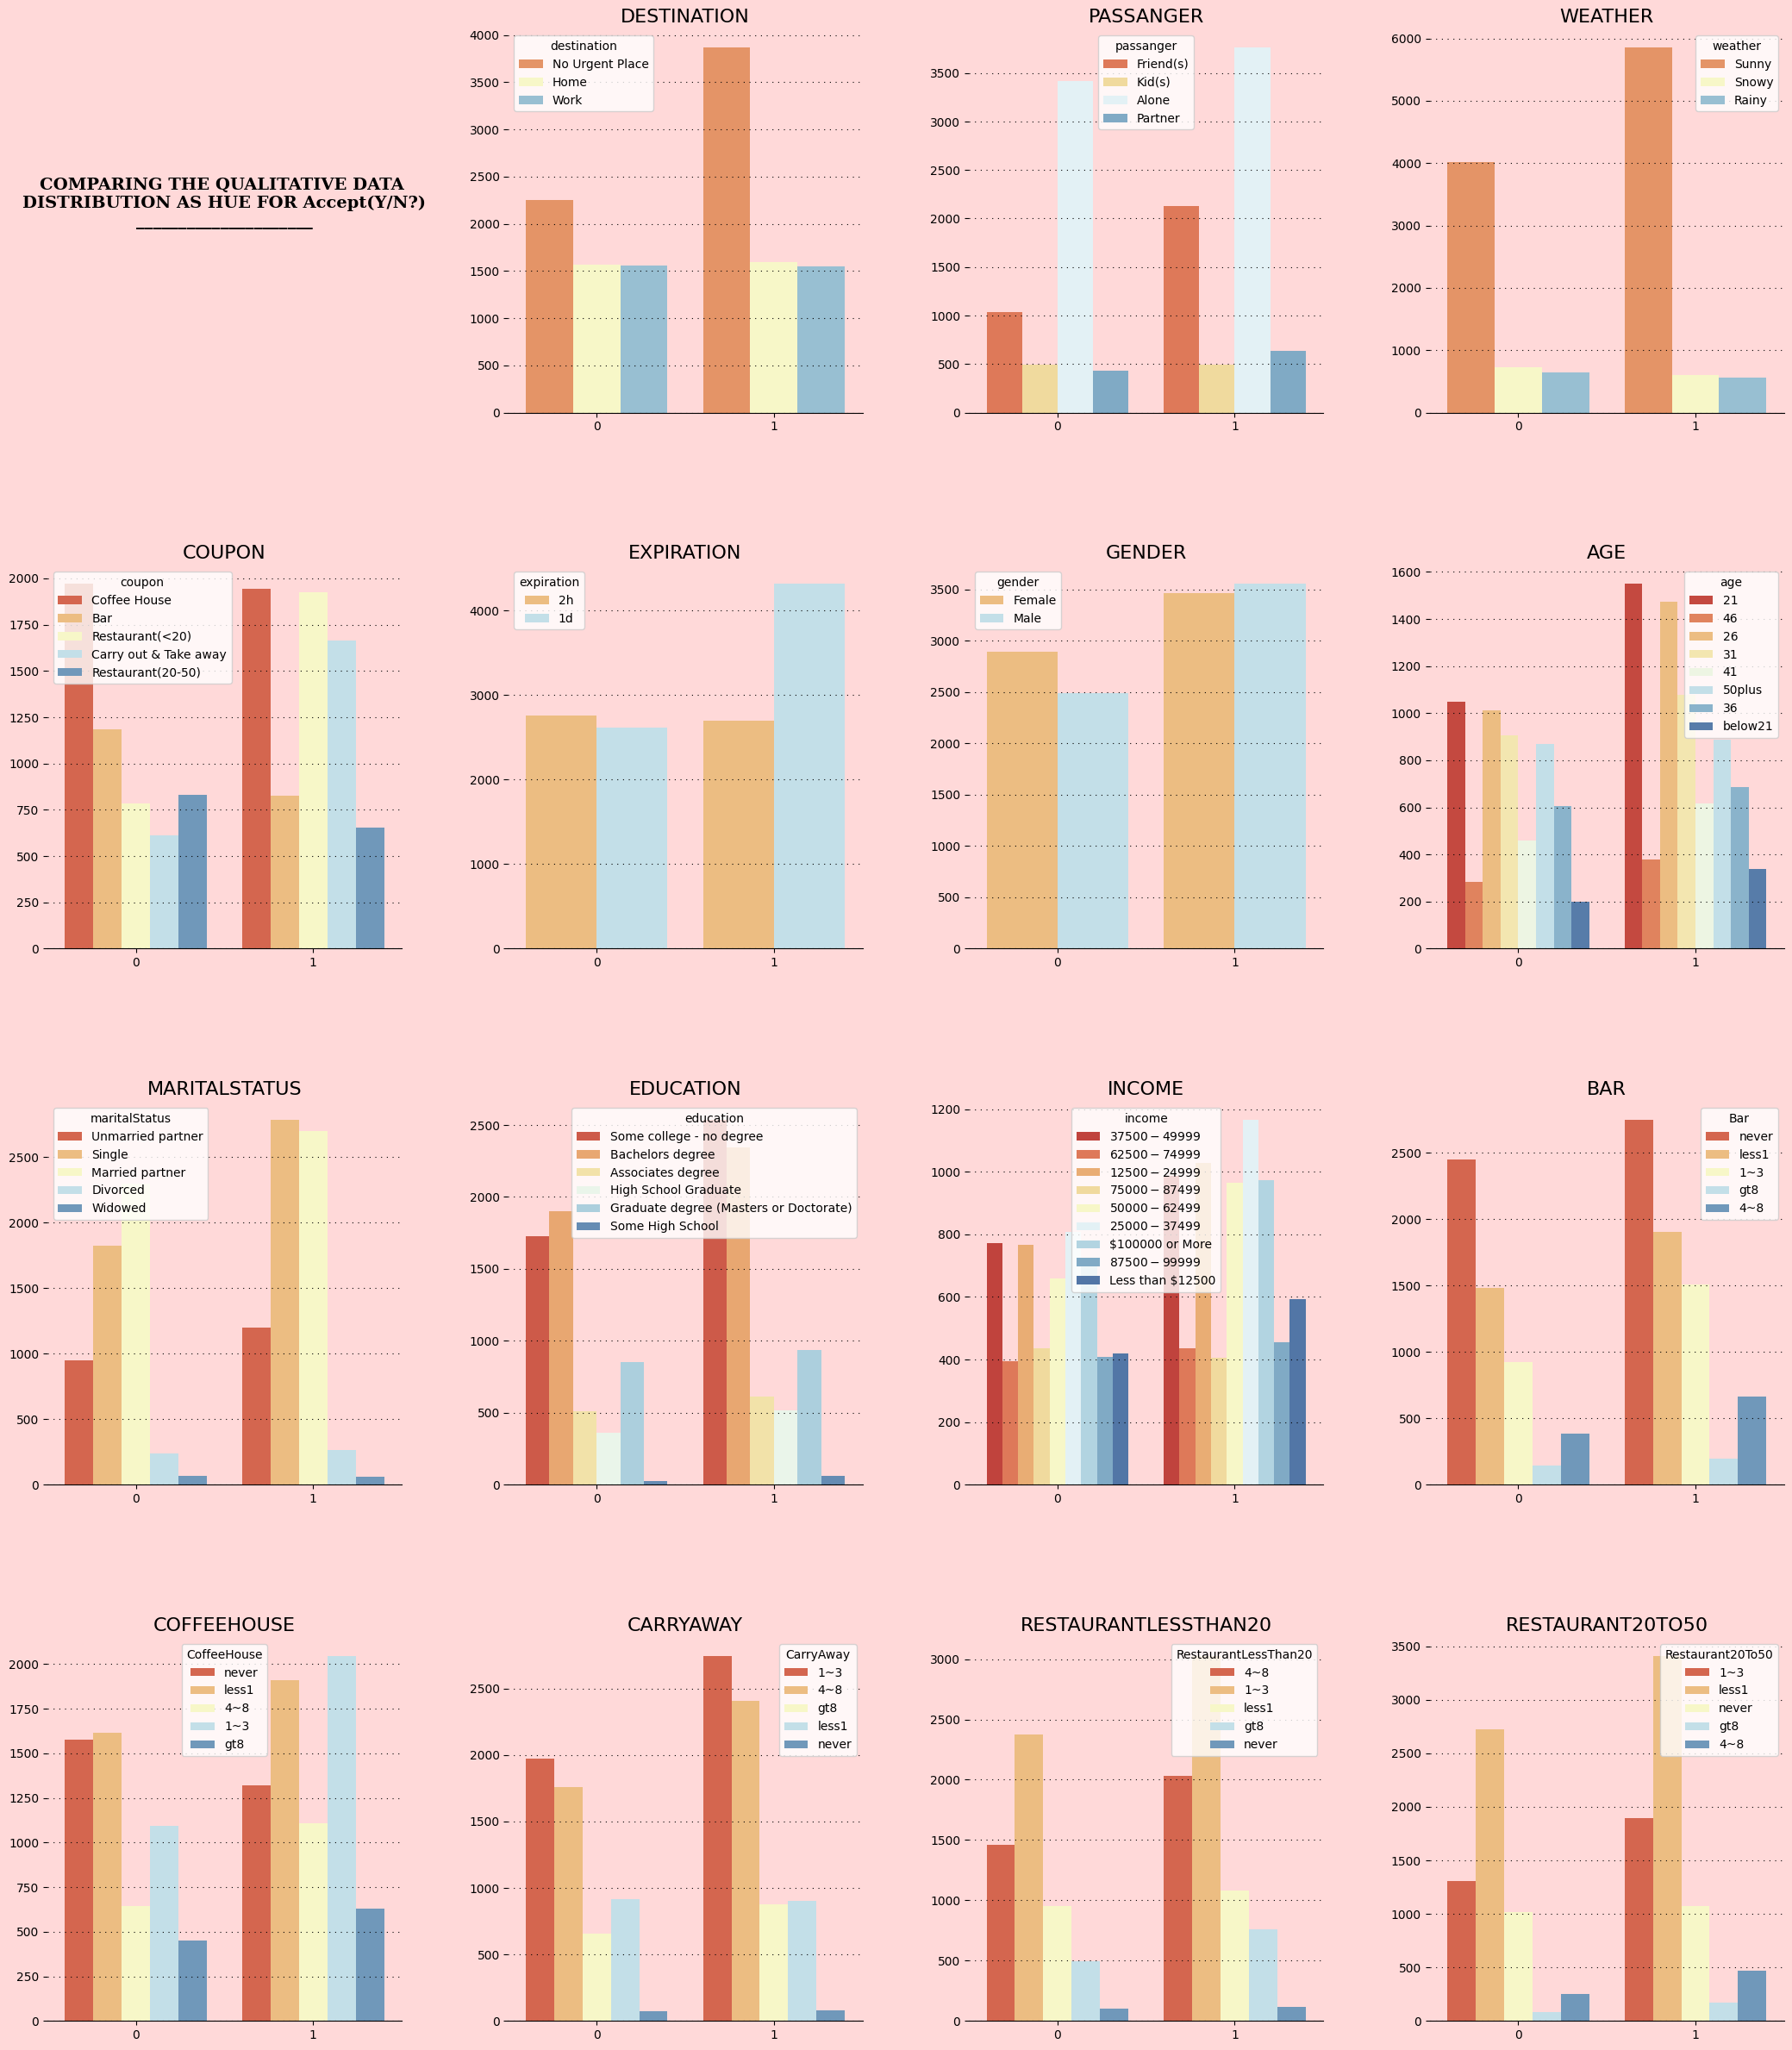

In [15]:
# Comparing the proportion of distribution of targets across categorical classes

# Creating the plot structure
fig = plt.figure(figsize=(26, 30))
spec = fig.add_gridspec(4, 4)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])


# adding color preference
bg_color = '#ffd9d9'
for section in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16]:
    section.set_facecolor(bg_color)

sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
        sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16]

cnt = 0
for feature in data:
    if data[feature].dtype=='O' and feature !='occupation':
        sns.countplot(data, x='Accept(Y/N?)',hue=feature, ax=sec[cnt], palette='RdYlBu')
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature.upper(), fontsize=16)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

        for position in ['top', 'right', 'left']:
            sec[cnt].spines[position].set_visible(False)
        cnt+=1

# Creating plot structure title
sec_01.text(0.5,0.5,'COMPARING THE QUALITATIVE DATA \nDISTRIBUTION AS HUE FOR Accept(Y/N?)\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing axis and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)


In [16]:
# OBSERVATION ON QUALITATIVE DATA DISTRIBUTION :

#  1. Customers with no urgent place as their destination have higher chance of buying coupon.
#  2. Mostly customers travelling alone have higher chance of accepting the coupon. 
#  3. The chances of a customer accepting a coupon is much higher if it's a sunny weather.
#  4. The coupons that are mostly bought are 1]coffee House 2]Resturant(<20) 3]Carry out and take away
#  5. Customers mostly buy 1d expiration coupon rather than 2h.
#  6. Huge amounts of coupons are bought by people between the age 21-26.
#  7. Single and married people both have high chances of accepting a coupon.
#  8. People who are in college or have bachelor's degree are the one's mostly buying the coupons.
#  9. The three major income categories whi buy the coupon are :   1] 25000 - 37499  2] 12500 - 24999  3] 37500 - 49999
# 10. Most people go to resturants,coffehouse and carry out which explains the type of coupon taken by the customers.

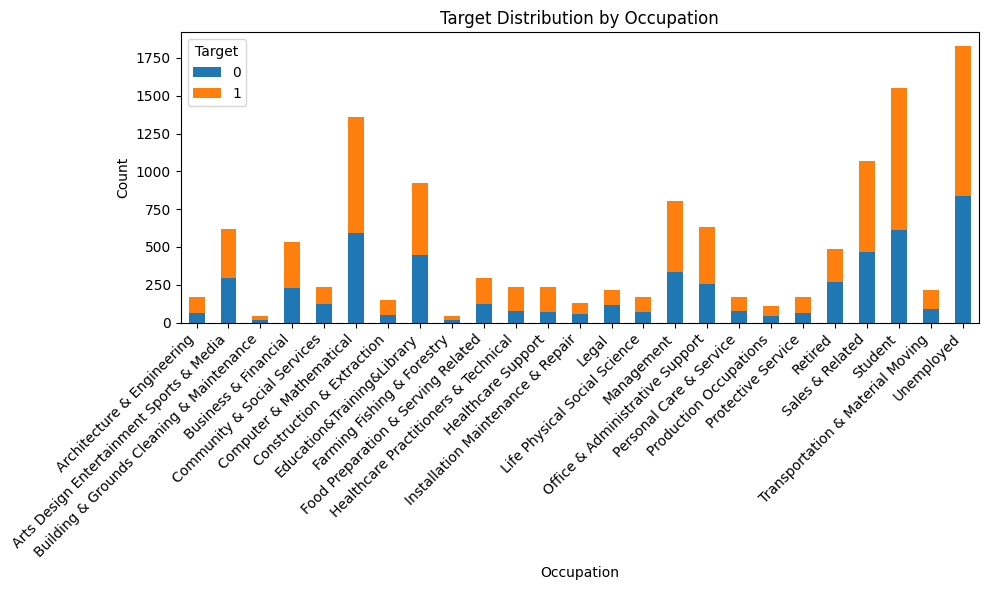

In [26]:
# Creating a crosstab to count target values per occupation
crosstab_df = pd.crosstab(data['occupation'], data['Accept(Y/N?)'])

# Ploting a stacked bar chart
crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Target Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target')
plt.tight_layout()
plt.show()


In [18]:
#   Mostly customers having these four occupations seem to have accepted more coupons :
#      1] Unemployed   2] Students  3]Computer and mathematical   4] Sales and related      

# Bivariate Analysis

In [27]:
# focusing on customers who purchase the coupon
data_y_1 = data[data['Accept(Y/N?)'] == 1]

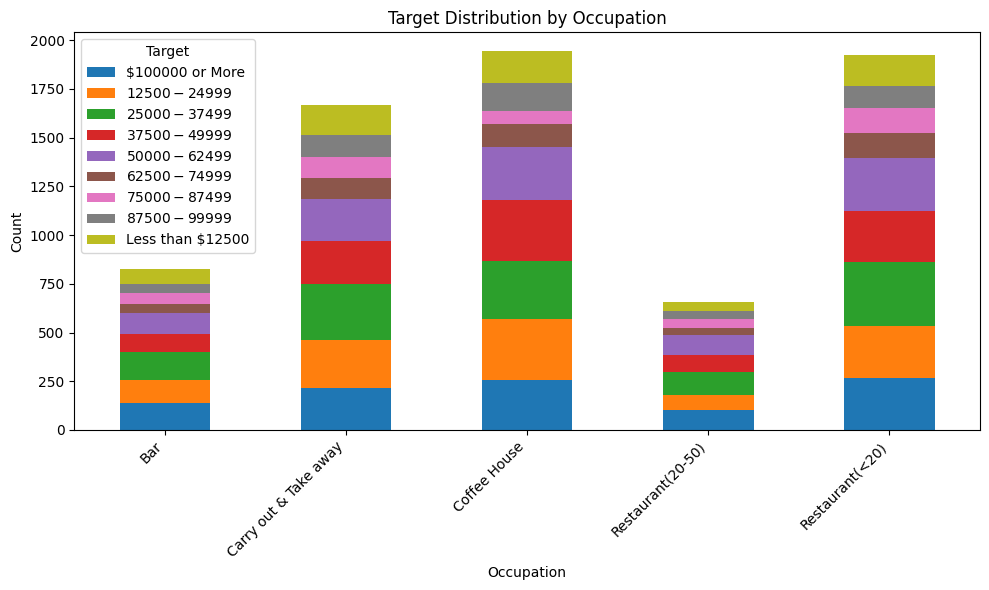

In [31]:
# Creating a crosstab to count target values per occupation
crosstab_df = pd.crosstab(data_y_1['coupon'], data_y_1['income'])

# Ploting a stacked bar chart
crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Target Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target')
plt.tight_layout()
plt.show()